In [8]:
import pandas as pd
import json

filename = "zillow_properties_data.json"

zillow_df = pd.read_json(filename)
zillow_df_sorted = zillow_df.sort_values(by=['state', 'city'])
# Remove rows where price is 0
zillow_df_filtered = zillow_df_sorted[~((zillow_df_sorted['price'] == 0))]

# Display the shape of the new DataFrame to confirm the filtering
#print(f"Original DataFrame shape: {zillow_df_sorted.shape}")
#print(f"Filtered DataFrame shape: {zillow_df_filtered.shape}")


median_price_by_state = zillow_df_filtered.groupby('state')['price'].median().reset_index()

print(median_price_by_state)


   state     price
0     AL  290000.0
1     AR  208500.0
2     AZ  413200.0
3     CA  723800.0
4     CO  501000.0
5     CT  564700.0
6     DC  710000.0
7     DE  365750.0
8     FL  370000.0
9     GA  354200.0
10    HI  720000.0
11    IA  255500.0
12    IL  313250.0
13    IN  179000.0
14    KY  354100.0
15    LA  275600.0
16    MA  655000.0
17    MD  467450.0
18    ME  385650.0
19    MI  205000.0
20    MN  375750.0
21    MO  631050.0
22    NC  382812.5
23    NE  190000.0
24    NH  432300.0
25    NJ  517800.0
26    NV  486150.0
27    NY  600000.0
28    OH  226000.0
29    OK  255100.0
30    OR  621750.0
31    PA  282500.0
32    RI  360000.0
33    SC  330000.0
34    TN  340000.0
35    TX  507600.0
36    VA  335000.0
37    VT  317750.0
38    WA  638000.0
39    WI  310467.0
40    WV  373950.0


In [10]:
median_price_by_state.to_json('median_price_by_state.json', orient='records', lines=True)

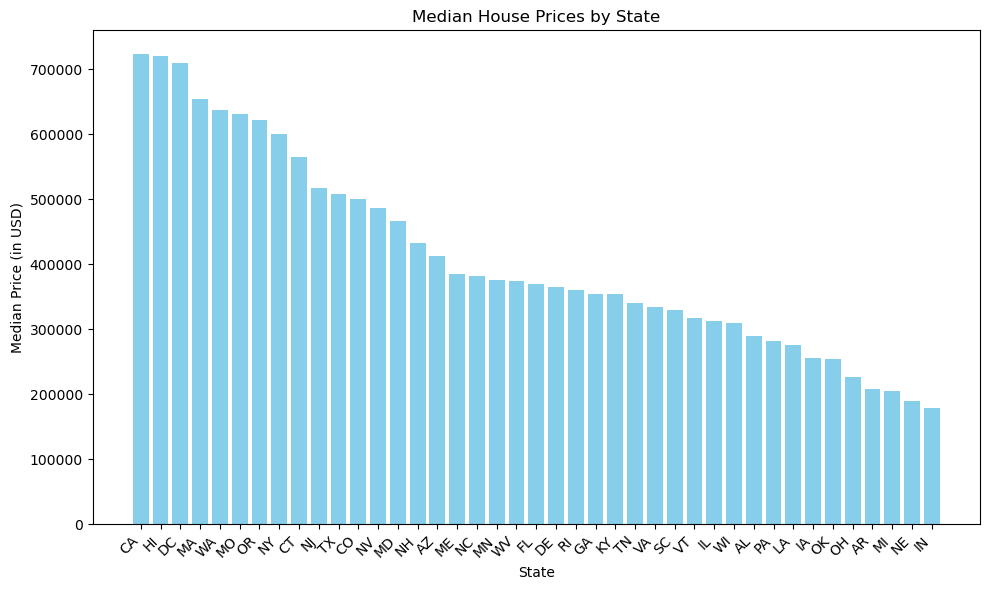

In [12]:
import matplotlib.pyplot as plt


# Sort the DataFrame by price (for better visualization)
median_price_by_state = median_price_by_state.sort_values(by='price', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_price_by_state['state'], median_price_by_state['price'], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Median Price (in USD)')
plt.title('Median House Prices by State')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
